In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_raw = pd.read_csv('data_ml.csv',index_col=0) 

In [21]:
idx_date = (data_raw['date'] > '1999-12-31') & (data_raw['date'] < '2019-01-01')
data_ml = data_raw.loc[idx_date, :].sort_values(by=['stock_id', 'date']).copy()

data_ml.iloc[0:6, 0:6]  

,stock_id,date,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover
177279,1,2000-01-31,0.41,0.39,0.42,0.19
177280,1,2000-02-29,0.41,0.39,0.40,0.19
182908,1,2000-03-31,0.40,0.37,0.37,0.20
182909,1,2000-04-30,0.39,0.36,0.37,0.20
182910,1,2000-05-31,0.40,0.42,0.40,0.20
182911,1,2000-06-30,0.41,0.47,0.42,0.21


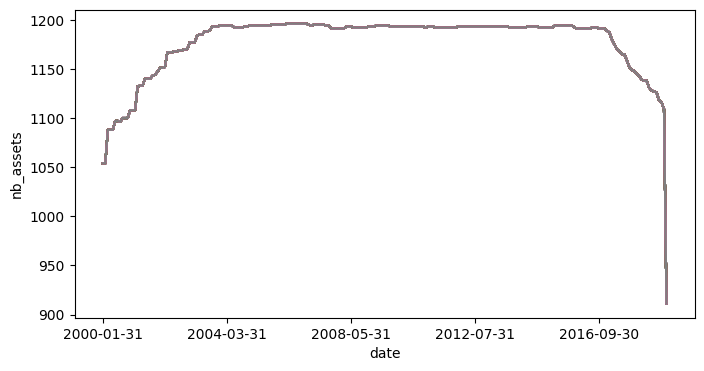

In [22]:
# counting the number of assets for each date
data_ml.groupby('date').count().plot(figsize=(8,4), legend=False) 
plt.ylabel('nb_assets');

In [34]:
features= list(data_ml.iloc[:,2:95].columns)
features_short =["Div_Yld", "Eps", "Mkt_Cap_12M_Usd", "Mom_11M_Usd", 
                    "Ocf", "Pb", "Vol1Y_Usd"]

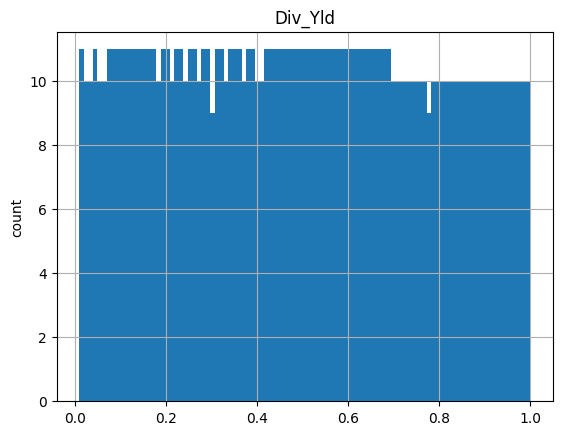

In [41]:
is_custom_date = data_ml['date']=='2000-02-29'
data_ml[is_custom_date].loc[:,['Div_Yld']].hist(bins=100) # using the hist 
plt.ylabel('count');

In [59]:
df_median = data_ml[['date','R1M_Usd','R12M_Usd']].groupby(['date']).median()
df_median.rename(columns = {"R1M_Usd": "R1M_Usd_median", "R12M_Usd": "R12M_Usd_median"}, inplace=True)
df = pd.merge(data_ml, df_median, how='left', on='date')
data_ml['R1M_Usd_C'] = np.where(df['R1M_Usd'] > df['R1M_Usd_median'], 1.0, 0.0)
data_ml['R12M_Usd_C'] = np.where(df['R12M_Usd'] > df['R12M_Usd_median'], 1.0, 0.0)
del df_median, df

In [60]:
separation_date = "2014-01-15"
idx_train = data_ml['date'] < separation_date
idx_test = data_ml['date'] >= separation_date

In [66]:
# A list of all stock_ids
stock_ids = data_ml['stock_id'].unique()
# compute the number of data points per stock
stock_days = data_ml[['date','stock_id']].groupby(['stock_id']).count().reset_index()
# Stocks with full data
stock_ids_short = stock_days.loc[stock_days['date'] == (stock_days['date'].max())] 
stock_ids_short = stock_ids_short['stock_id'].unique()
# compute returns in matrix format
is_stock_ids_short  =data_ml['stock_id'].isin(stock_ids_short)  
returns = data_ml[is_stock_ids_short].pivot(index='date', columns='stock_id', values='R1M_Usd') 